# Data cleaning

In [1]:
import pandas as pd
from pandas import Series,DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

sns.set(style="white", palette="pastel", color_codes=True)

import numpy as np

random_state = 142857

File reading.

In [2]:
autos_df = pd.read_csv('autos.csv', encoding = 'ISO-8859-1')
autos_df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [3]:
autos_df[:4].transpose()

,0,1,2,3
dateCrawled,2016-03-24 11:52:17,2016-03-24 10:58:45,2016-03-14 12:52:21,2016-03-17 16:54:04
name,Golf_3_1.6,A5_Sportback_2.7_Tdi,"Jeep_Grand_Cherokee_""Overland""",GOLF_4_1_4__3TÜRER
seller,privat,privat,privat,privat
offerType,Angebot,Angebot,Angebot,Angebot
price,480,18300,9800,1500
abtest,test,test,test,test
vehicleType,NaN,coupe,suv,kleinwagen
yearOfRegistration,1993,2011,2004,2001
gearbox,manuell,manuell,automatik,manuell
powerPS,0,190,163,75


Dropping the columns that we will not use.

In [4]:
columns = ['dateCrawled',
           'postalCode', 
           'dateCreated', 
           'lastSeen', 
           'name', 
           'seller', 
           'offerType', 
           'abtest',
           'nrOfPictures']
autos_df.drop(columns, axis = 1, inplace = True)
autos_df.head().transpose()

,0,1,2,3,4
price,480,18300,9800,1500,3600
vehicleType,NaN,coupe,suv,kleinwagen,kleinwagen
yearOfRegistration,1993,2011,2004,2001,2008
gearbox,manuell,manuell,automatik,manuell,manuell
powerPS,0,190,163,75,69
model,golf,NaN,grand,golf,fabia
kilometer,150000,125000,125000,150000,90000
monthOfRegistration,0,5,8,6,7
fuelType,benzin,diesel,diesel,benzin,diesel
brand,volkswagen,audi,jeep,volkswagen,skoda


Dropping the following lines:
 - Price = 0 or price >= 20000. 
 - Huge number in powerPS.
 - Year of registration <= 1950.

In [5]:
autos_df = autos_df[autos_df['price'] > 0]
autos_df = autos_df[autos_df['price'] < 20000]
autos_df = autos_df[autos_df['powerPS'] < 800]
autos_df = autos_df[autos_df['yearOfRegistration'] > 1950]

# Feature engineering

Dropping unknown gearbox and adding dummy variables on what is left.

In [6]:
autos_df = autos_df[autos_df['gearbox'].notnull()]
gearbox_dummies = pd.get_dummies(autos_df['gearbox'])
gearbox_dummies.columns = ['automatik gearbox', 'manuell']
gearbox_dummies.drop(['manuell'], axis = 1, inplace = True)
autos_df = autos_df.join(gearbox_dummies)
autos_df.drop(['gearbox'], axis = 1, inplace = True)

Dropping unknown vehicle type and adding dummy variables on what is left. We also have to rename the 'andere' column to avoid column name conflicts later.

In [7]:
autos_df = autos_df[autos_df['vehicleType'].notnull()]
vehicle_type_dummies = pd.get_dummies(autos_df['vehicleType'])
vehicle_type_columns = list(vehicle_type_dummies.columns)
andere_index = vehicle_type_columns.index('andere')
vehicle_type_dummies.columns = vehicle_type_columns[:andere_index] + ['andere type'] + vehicle_type_columns[andere_index + 1:]
autos_df = autos_df.join(vehicle_type_dummies)
autos_df.drop(['vehicleType'], axis = 1, inplace = True)

Dropping unknown model and adding dummy variable on what is left. We also rename the 'andere' column for the same reason as before.

In [8]:
autos_df = autos_df[autos_df['model'].notnull()]
model_dummies = pd.get_dummies(autos_df['model'])
model_columns = list(model_dummies.columns)
andere_index = model_columns.index('andere')
model_dummies.columns = model_columns[:andere_index] + ['andere model'] + model_columns[andere_index + 1:]
autos_df = autos_df.join(model_dummies)
autos_df.drop(['model'], axis = 1, inplace = True)

Adding dummy variables for the brand name.

In [9]:
brand_dummies = pd.get_dummies(autos_df['brand'])
autos_df = autos_df.join(brand_dummies)
autos_df.drop(['brand'], axis = 1, inplace = True)

Dropping unknown fuelType and adding dummy variable on what is left. We also rename the 'andere' column for the same reason as before.

In [10]:
autos_df = autos_df[autos_df['fuelType'].notnull()]
fuel_dummies = pd.get_dummies(autos_df['fuelType'])
fuel_columns = list(fuel_dummies.columns)
andere_index = fuel_columns.index('andere')
fuel_dummies.columns = fuel_columns[:andere_index] + ['andere fuel'] + fuel_columns[andere_index + 1:]
autos_df = autos_df.join(fuel_dummies)
autos_df.drop(['fuelType'], axis = 1, inplace = True)

A lot of cars (40820) have 0 powerPS, this seems to represent an unknown value. We could remove these lines or try to replace this value with the mean. As these values have an influence on the final price, it is probably better to remove the unknown entries.

In [11]:
autos_df = autos_df[autos_df['powerPS'] != 0]

For the 'notRepairedDamage', we are going to assume that if this field is NaN, then the cars does not have unrepaired damages.

In [12]:
autos_df['notRepairedDamage'][autos_df['notRepairedDamage'].isnull()] = 'nein'
damage_dummies = pd.get_dummies(autos_df['notRepairedDamage'])
damage_dummies.columns = ['damage', 'no damage']
damage_dummies.drop(['no damage'], axis = 1, inplace = True)
autos_df = autos_df.join(damage_dummies)
autos_df.drop(['notRepairedDamage'], axis = 1, inplace = True)

In [13]:
autos_df.head().transpose()

,2,3,4,5,6
price,9800.0,1500.0,3600.0,650.0,2200.0
yearOfRegistration,2004.0,2001.0,2008.0,1995.0,2004.0
powerPS,163.0,75.0,69.0,102.0,109.0
kilometer,125000.0,150000.0,90000.0,150000.0,150000.0
monthOfRegistration,8.0,6.0,7.0,10.0,8.0
automatik gearbox,1.0,0.0,0.0,0.0,0.0
andere type,0.0,0.0,0.0,0.0,0.0
bus,0.0,0.0,0.0,0.0,0.0
cabrio,0.0,0.0,0.0,0.0,1.0
coupe,0.0,0.0,0.0,0.0,0.0


# Visualization

## Histograms

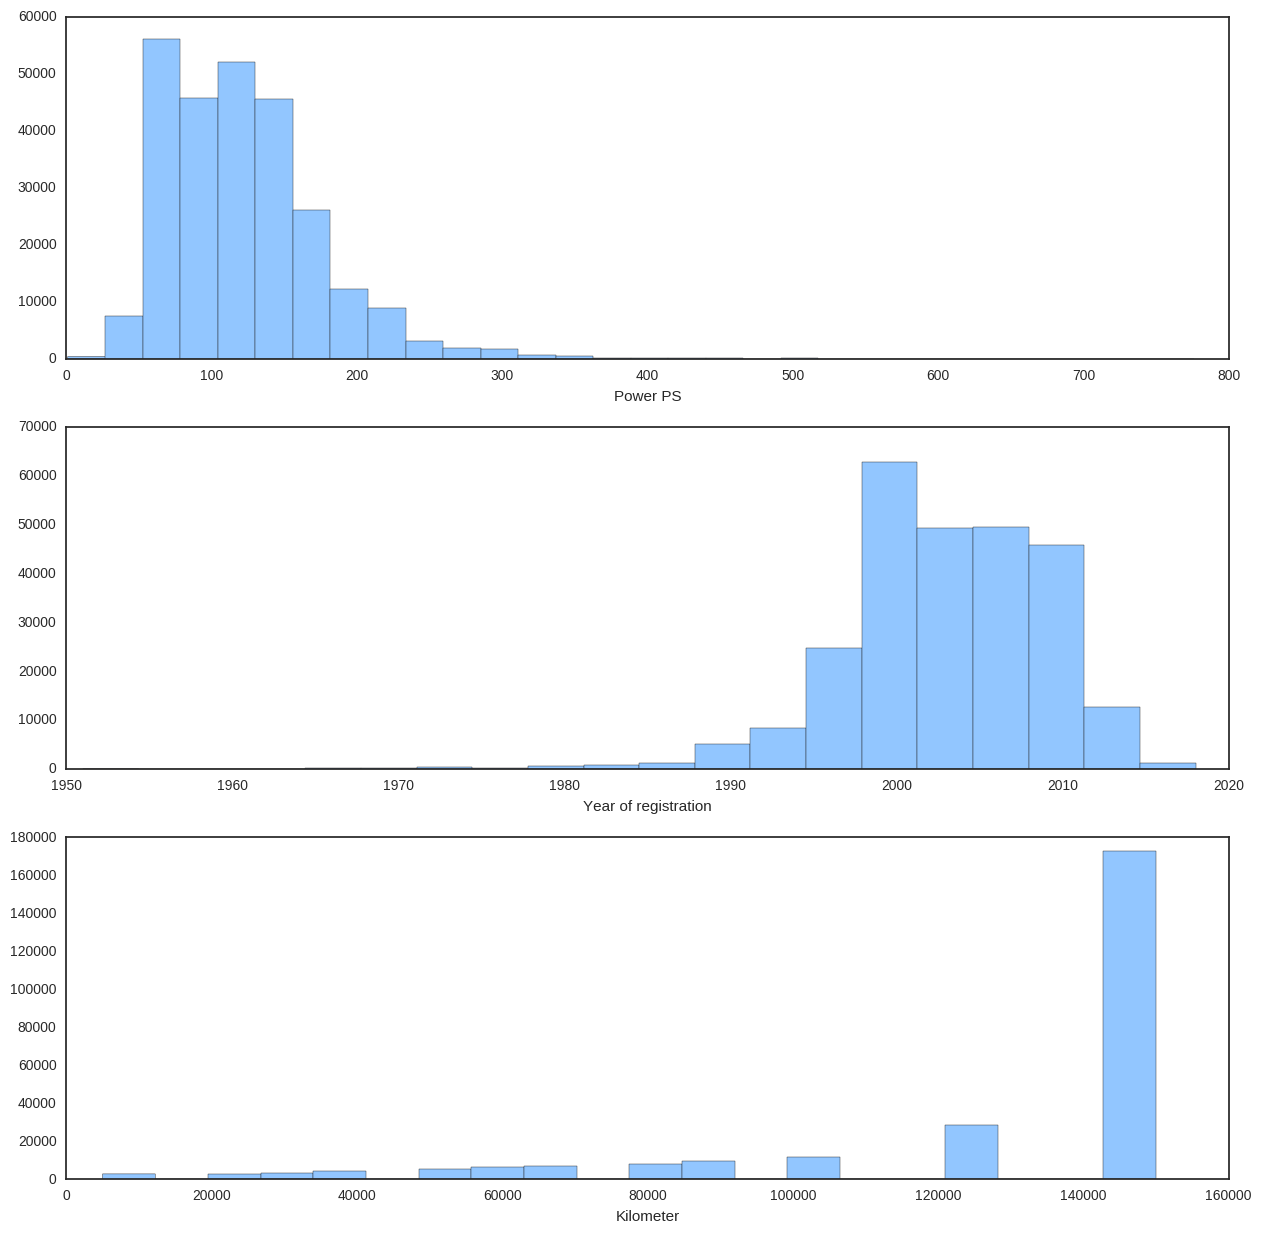

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

ax[0].hist(autos_df['powerPS'], bins = 30)
ax[0].set_xlabel('Power PS')

ax[1].hist(autos_df['yearOfRegistration'], bins = 20)
ax[1].set_xlabel('Year of registration')
ax[1].set_ylabel('')

ax[2].hist(autos_df['kilometer'], bins = 20)
ax[2].set_xlabel('Kilometer')

## Violinplot

In [15]:
cat_number = 7
powerPS_dec = pd.cut(autos_df['powerPS'], cat_number, labels = ['powerPS cat %d' % cat for cat in range(cat_number)])
year_reg_dec = pd.cut(autos_df['yearOfRegistration'], cat_number, labels = ['reg year cat %d' % cat for cat in range(cat_number)])
kilometer_dec = pd.cut(autos_df['kilometer'], cat_number, labels = ['kilo cat %d' % cat for cat in range(cat_number)])

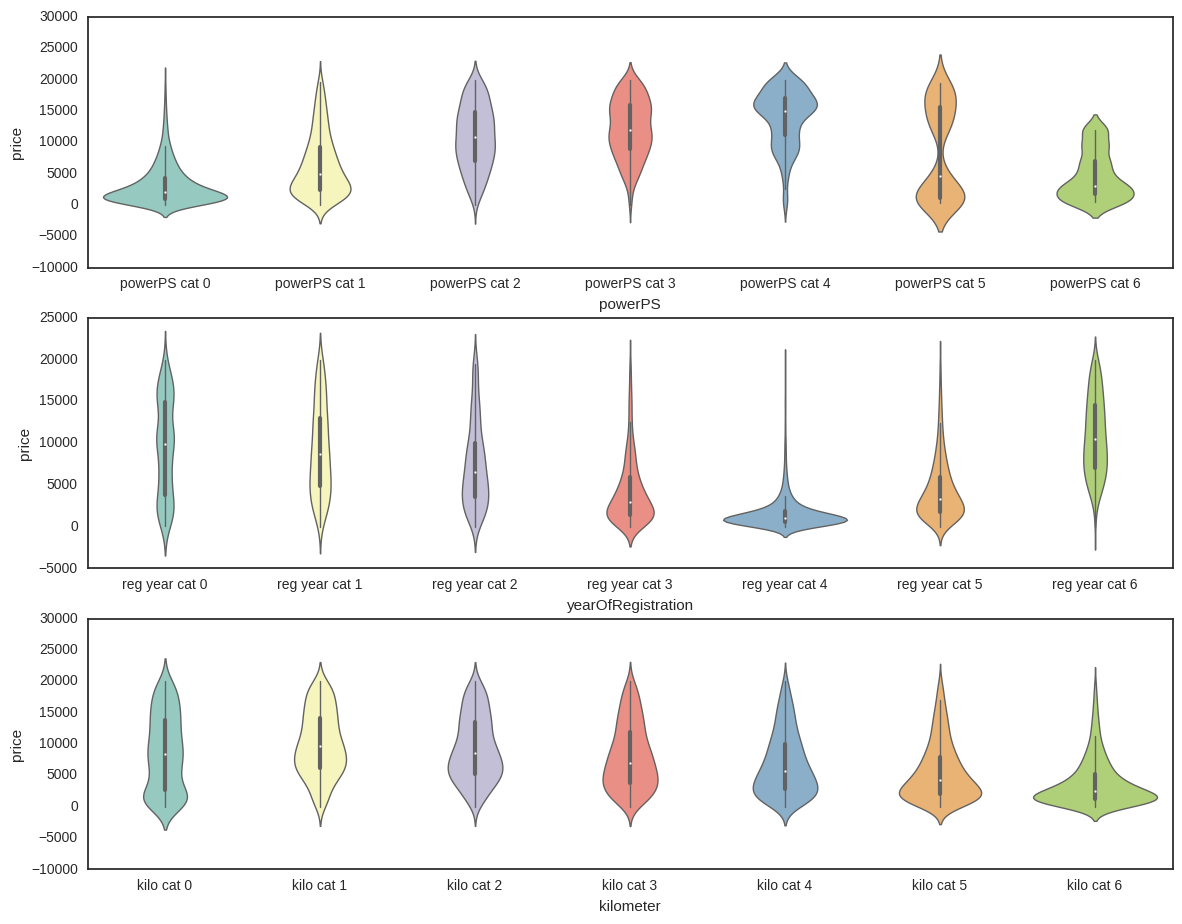

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(14, 11))

sns.violinplot(powerPS_dec, autos_df['price'], inner = 'box', palette = 'Set3', bw = .3, linewidth = 1, ax = ax[0])
sns.violinplot(year_reg_dec, autos_df['price'], inner = 'box', palette = 'Set3', bw = .3, linewidth = 1, ax = ax[1])
sns.violinplot(kilometer_dec, autos_df['price'], inner = 'box', palette = 'Set3', bw = .3, linewidth = 1, ax = ax[2])

# Prediction

In [17]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble         import RandomForestRegressor 

In [18]:
# autos_df = autos_df.sample(frac=0.1)

In [19]:
X = autos_df.drop(['price'], axis = 1).as_matrix()
y = autos_df['price'].as_matrix()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.1)

In [20]:
model = RandomForestRegressor(n_estimators=100, random_state = random_state)
model.fit(Xtrain, ytrain)
print(model.score(Xtest, ytest))

0.89828821188
